In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [85]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\adult20.csv",index_col=0)
df.head()

,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
age,,,,,,,,,,,,,,
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,yes
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,yes
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,yes
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,yes
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,yes


In [86]:
y_mapping={"no":0 ,"yes":1}
workclass_mapping={" State-gov":0 , " Self-emp-not-inc":1 , " Private":2 , " Federal-gov":3 , " Self-emp-inc":4 , " Local-gov":5 , " Without-pay":6}
education_mapping={' Bachelors':0, ' Some-college':1, ' 11th':2, ' HS-grad':3, ' Prof-school':4, 
                   ' Assoc-acdm':5, ' Assoc-voc':6, ' 9th':7, ' 7th-8th':8, ' 12th':9, ' Masters':10, 
                   ' 1st-4th':11, ' 10th':12, ' Doctorate':13, ' 5th-6th':14, ' Preschool':15}
marital_status_mapping={' Married-civ-spouse':0, ' Divorced':1, ' Never-married':2, ' Separated':3, ' Widowed':4, 
                        ' Married-spouse-absent':5, ' Married-AF-spouse':6}
occupation_mapping={' Tech-support':0, ' Craft-repair':1, ' Other-service':2, ' Sales':3, ' Exec-managerial':4, 
                    ' Prof-specialty':5, ' Handlers-cleaners':6, ' Machine-op-inspct':7, ' Adm-clerical':8, ' Farming-fishing':9, 
                    ' Transport-moving':10, ' Priv-house-serv':11, ' Protective-serv':12, ' Armed-Forces':13}
relationship_mapping={' Wife':0, ' Own-child':1, ' Husband':2, ' Not-in-family':3, ' Other-relative':4, ' Unmarried':5}
race_mapping={' White':0, ' Asian-Pac-Islander':1, ' Amer-Indian-Eskimo':2, ' Other':3, ' Black':4}
sex_mapping={' Female':0 , ' Male':1}
native_country_mapping={' Cambodia':0,' Canada':1,' China':2,' Columbia':3,' Cuba':4,' Dominican-Republic':5,' Ecuador':6,
                        ' El-Salvador':7,' England':8,' France':9,' Germany':10,' Greece':11,' Guatemala':12,' Haiti':13,
                        ' Honduras':14,' Hong':15,' India':16,' Iran':17,' Ireland':18,' Italy':19,' Jamaica':20,' Mexico':21,
                        ' Laos':22,' Japan':23,' Outlying-US(Guam-USVI-etc)':24,' Nicaragua':25,' Philippines':26,' Poland':27,
                        ' Peru':28,' Puerto-Rico':29,' Portugal':30,' South':31,' Scotland':32,' Thailand':33,' Taiwan':34,
                        ' Trinadad&Tobago':35,' United-States':36,' Yugoslavia':37,' Vietnam':38}


df['y']=df['y'].map(y_mapping)
df['workclass']=df['workclass'].map(workclass_mapping)
df['education']=df['education'].map(education_mapping)
df['marital_status']=df['marital_status'].map(marital_status_mapping)
df['occupation']=df['occupation'].map(occupation_mapping)
df['relationship']=df['relationship'].map(relationship_mapping)
df['race']=df['race'].map(race_mapping)
df['sex']=df['sex'].map(sex_mapping)
df['native_country']=df['native_country'].map(native_country_mapping)
df.head()

,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
age,,,,,,,,,,,,,,
39,0,77516,0,13,2,8,3,0,1,2174,0,40,36,1
50,1,83311,0,13,0,4,2,0,1,0,0,13,36,1
38,2,215646,3,9,1,6,3,0,1,0,0,40,36,1
53,2,234721,2,7,0,6,2,4,1,0,0,40,36,1
28,2,338409,0,13,0,5,0,4,0,0,0,40,4,1


In [87]:
print(df['y'].unique())
print(df['workclass'].unique())
print(df['education'].unique())
print(df['marital_status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native_country'].unique())

[1 0]
[0 1 2 3 5 4 6]
[ 0  3  2 10  7  1  5  8 13  6  4 14 12 15  9 11]
[2 0 1 5 3 6 4]
[ 8  4  6  5  2  3 10  9  7  0  1 12 13 11]
[3 2 0 1 5 4]
[0 4 1 2 3]
[1 0]
[36  4 20 16 21 29 14  8  1 10 17 26 27  3  0 33  6 22 34 13 30  5  7  9
 12 19  2 31 23 37 28 24 32 35 11 25 38 15 18]


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('y',axis=1))
scaled_features = scaler.transform(df.drop('y',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,-2.109618,-1.071904,-0.986779,1.144448,0.810901,1.100562,0.500023,-0.375064,0.685349,0.150439,-0.224819,-0.093646,0.275600
1,-1.126572,-1.017352,-0.986779,1.144448,-0.897207,-0.246715,-0.311383,-0.375064,0.685349,-0.148842,-0.224819,-2.371426,0.275600
2,-0.143526,0.228397,-0.099558,-0.441458,-0.043153,0.426923,0.500023,-0.375064,0.685349,-0.148842,-0.224819,-0.093646,0.275600
3,-0.143526,0.407961,-0.395298,-1.234411,-0.897207,0.426923,-0.311383,2.926316,0.685349,-0.148842,-0.224819,-0.093646,0.275600
4,-0.143526,1.384038,-0.986779,1.144448,-0.897207,0.090104,-1.934195,2.926316,-1.459110,-0.148842,-0.224819,-0.093646,-4.980886


In [89]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = df_feat
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [90]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

#從k=1開始測試
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [91]:
#測試KNN演算法的好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[167 141]
 [134 849]]


In [92]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.55      0.54      0.55       308
           1       0.86      0.86      0.86       983

    accuracy                           0.79      1291
   macro avg       0.71      0.70      0.70      1291
weighted avg       0.79      0.79      0.79      1291



In [93]:
#剛剛只先用了k=1來建立模型，現在利用for loop來建立迴圈，選擇k值
error_rate = []

for i in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

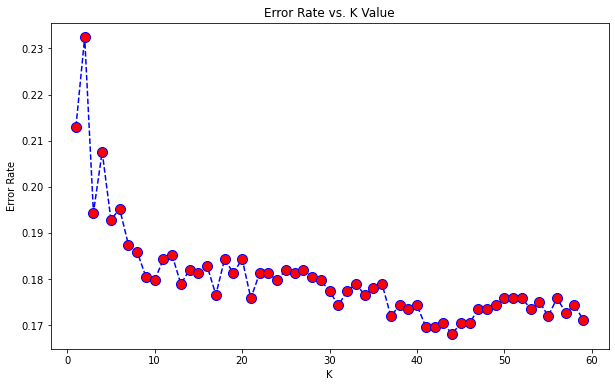

In [94]:
#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [95]:
#跟一開始k=1做比較
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=1


[[167 141]
 [134 849]]


              precision    recall  f1-score   support

           0       0.55      0.54      0.55       308
           1       0.86      0.86      0.86       983

    accuracy                           0.79      1291
   macro avg       0.71      0.70      0.70      1291
weighted avg       0.79      0.79      0.79      1291



In [96]:
#擇錯誤率最低的K=40來看precision、recall、f1-score、support表現
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=1


[[164 144]
 [ 81 902]]


              precision    recall  f1-score   support

           0       0.67      0.53      0.59       308
           1       0.86      0.92      0.89       983

    accuracy                           0.83      1291
   macro avg       0.77      0.73      0.74      1291
weighted avg       0.82      0.83      0.82      1291



In [97]:
#https://reurl.cc/YjkaWO

In [98]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,pred)
print("MAE: ",mae)

MAE:  0.17428350116189


In [99]:
import math
MSE = np.square(np.subtract(y_test,pred)).mean() 
RMSE = math.sqrt(MSE)
print("RMSE: ",RMSE)

RMSE:  0.4174727549935325


In [103]:
mape = mean_absolute_error(y_test,pred)*100
print("MAPE: ",mape)

MAPE:  17.428350116189


In [104]:
from sklearn import metrics
print('R2 score: ', knn.score(X, y))
mse = metrics.mean_squared_error(y_test,pred)
print('MSE score: ', mse)

R2 score:  0.8298202107873528
MSE score:  0.17428350116189
